In [1]:
%load_ext autoreload
%autoreload 2

from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/My Drive/aqc/dev'
!pip install cupy-cuda100

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/physics/aqc/dev


## Gauss Beam

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from aqc.aqc import AQC
from aqc.grid import RectGrid, RandLogPolarGrid
from aqc.sources import GaussianSource
from aqc.pathes import VacuumPath, IdenticalPhaseScreensPath
from aqc.phase_screens import FFTPhaseScreen, SUPhaseScreen
from aqc.theory.models import MVKModel, KModel, TModel

from aqc.measures import mean_r2

In [3]:
sim_gauss = AQC(
  grid=RectGrid(
    resolution=2**9, 
    delta=0.002
  ), 
  source=GaussianSource(
    wvl=809e-9, 
    w0=0.2, 
    F0=np.inf
  ),
  path=VacuumPath(
    length=4e3
  ),
  use_GPU=False
)

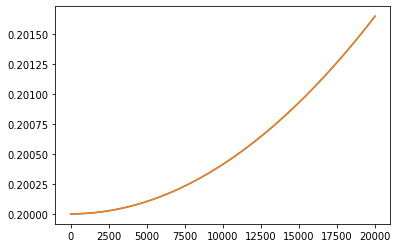

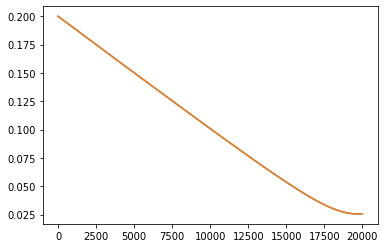

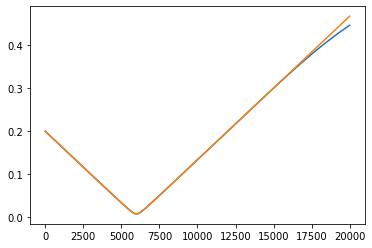

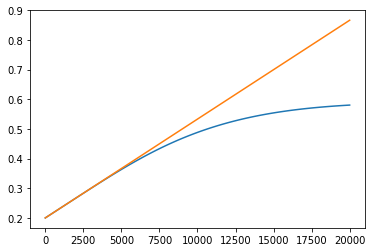

In [4]:
def test_gauss_w(channel):
  lengths = np.linspace(0, 20000, 100)
  actual_w = [np.sqrt(2 * mean_r2(channel, length=length, pupil=False)) for length in lengths]
  desire_w = channel.source.get_w(lengths)
  plt.plot(lengths, actual_w)
  plt.plot(lengths, desire_w)
  plt.show()

sim_gauss.source.F0 = np.inf
test_gauss_w(sim_gauss)

sim_gauss.source.F0 = 20000
test_gauss_w(sim_gauss)

sim_gauss.source.F0 = 6000
test_gauss_w(sim_gauss)

sim_gauss.source.F0 = -6000
test_gauss_w(sim_gauss)